In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
df=pd.read_csv("/home/rs/Downloads/global_data.csv")

In [3]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [4]:

df1=pd.read_csv('/home/rs/Downloads/case_time_series.csv')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             358 non-null    object
 1   Date_YMD         358 non-null    object
 2   Daily Confirmed  358 non-null    int64 
 3   Total Confirmed  358 non-null    int64 
 4   Daily Recovered  358 non-null    int64 
 5   Total Recovered  358 non-null    int64 
 6   Daily Deceased   358 non-null    int64 
 7   Total Deceased   358 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 22.5+ KB


In [6]:
df1.tail()


,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
353,17 January,2021-01-17,13962,10572599,14513,10210569,145,151865
354,18 January,2021-01-18,9987,10582586,17127,10227696,137,152002
355,19 January,2021-01-19,13787,10596373,17229,10244925,161,152163
356,20 January,2021-01-20,15279,10611652,20071,10264996,152,152315
357,21 January,2021-01-21,14490,10626142,17726,10282722,161,152476


In [7]:
#Recovery_rate using direct formula

In [8]:
recovery_rate=round(df1['Total Recovered']/df1['Total Confirmed']*100,2)

In [9]:
recovery_rate

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
353    96.58
354    96.65
355    96.68
356    96.73
357    96.77
Length: 358, dtype: float64

In [10]:
#recovery rate using new formula by Dr. Bhapkar

In [11]:
from statistics import mean
i=0
n=358
list1=df1['Total Confirmed']
list2=[]
while i<=n:
    list2.append(round(mean(list1[i:i+15])))
    i+=15
print(list2) 
print(type(list2)  )

recovery_r=[]
j=0
for i in range(n):
    if i %15 != 0 or i == 0:
        recovery_r.append(round(df1['Total Recovered'][i]/list2[j] * 100,2))
    elif i % 15 == 0 :
        j+=1
        recovery_r.append(round(df1['Total Recovered'][i]/list2[j] * 100,2))  
print(recovery_r)

[3, 3, 42, 483, 5142, 20477, 53725, 120365, 238168, 415639, 702451, 1171794, 1920649, 2843453, 3949493, 5291275, 6531755, 7531554, 8271847, 8927807, 9530677, 9978168, 10302500, 10540536]
<class 'list'>
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33, 33.33, 33.33, 66.67, 66.67, 66.67, 66.67, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 9.52, 9.52, 9.52, 23.81, 23.81, 2.69, 2.9, 3.11, 3.11, 4.14, 4.76, 4.76, 4.76, 5.18, 8.28, 8.9, 10.35, 15.53, 17.6, 21.12, 2.66, 2.92, 3.29, 3.71, 4.47, 5.56, 6.4, 7.66, 9.12, 10.99, 12.35, 15.29, 18.9, 21.12, 23.3, 6.67, 7.37, 8.63, 9.96, 12.04, 13.94, 15.98, 19.42, 21.34, 24.48, 26.84, 29.0, 31.86, 34.69, 37.79, 15.69, 16.86, 18.65, 20.2, 21.89, 23.91, 26.32, 28.48, 31.23, 33.29, 35.93, 39.03, 41.97, 45.52, 49.17, 23.27, 25.13, 28.46, 30.57, 32.63, 35.15, 37.74, 40.34, 43.06, 45.2, 47.93, 50.43, 53.41, 56.27, 58.9, 34.69, 36.5, 38.57, 40.2, 42.1, 

In [12]:
df2=df1
df2['Recovery_r']=recovery_r
df2['Recovery_rate']=recovery_rate
df2=df2.groupby("Date_YMD").sum()

In [13]:
df2.tail()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Recovery_r,Recovery_rate
Date_YMD,,,,,,,,
2021-01-17,13962,10572599,14513,10210569,145,151865,96.87,96.58
2021-01-18,9987,10582586,17127,10227696,137,152002,97.03,96.65
2021-01-19,13787,10596373,17229,10244925,161,152163,97.20,96.68
2021-01-20,15279,10611652,20071,10264996,152,152315,97.39,96.73
2021-01-21,14490,10626142,17726,10282722,161,152476,97.55,96.77


In [ ]:
#fatality rate

In [17]:
fatality_rate = round(df1['Total Deceased']/(df1['Total Confirmed']) * 100,2)

In [21]:
print(fatality_rate)

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
353    1.44
354    1.44
355    1.44
356    1.44
357    1.43
Length: 358, dtype: float64


In [22]:
#
df2['Fatality_rate'] = fatality_rate
df2['Fatality_rate'] = fatality_rate
df2.tail()
#df2.drop('Fatality_rate',inplace=True,axis=1)
#df2.info()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Recovery_r,Recovery_rate,Fatality_rate
Date_YMD,,,,,,,,,
2021-01-17,13962,10572599,14513,10210569,145,151865,96.87,96.58,NaN
2021-01-18,9987,10582586,17127,10227696,137,152002,97.03,96.65,NaN
2021-01-19,13787,10596373,17229,10244925,161,152163,97.20,96.68,NaN
2021-01-20,15279,10611652,20071,10264996,152,152315,97.39,96.73,NaN
2021-01-21,14490,10626142,17726,10282722,161,152476,97.55,96.77,NaN


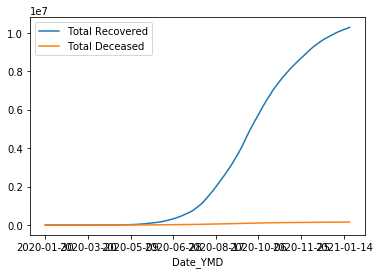

In [24]:
df2['Total Recovered'].plot()
df2['Total Deceased'].plot()
plt.legend()

In [33]:
fig=px.line(df1,x='Date_YMD', y=['Daily Recovered','Daily Deceased'], hover_name='Date_YMD',title='Daily Recovered vs Daily Deceased-COVID19')
fig.show()

In [38]:
fig1=px.line(df1,x='Date_YMD',y=['Total Confirmed','Total Recovered','Total Deceased'], hover_name='Date_YMD',title='Total Confirmed vs Total Recovered vs Total Deceased-COVID19')
fig1.show()